# Mobotix Thermal data downloading and plotting

In [1]:
import sage_data_client
import requests
import urllib
import os
import glob
import xarray as xr
import datetime
import cftime
import re
import pyart
import csv
import numpy as np
import cv2
from matplotlib import pyplot as plt


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
data_dir = '/Users/bhupendra/data/mobotix/'
node = "V017"
if not os.path.exists(data_dir):
    os.makedirs(data_dir+node)
out_dir = data_dir+node

In [8]:
# check documentation for all optional arguments
df = sage_data_client.query(
    start="2023-06-02T12:25:00",
    end="2023-06-02T13:25:10",
    filter={
        "plugin": "*mobotix-scan.*",
         "name": "upload",
         "vsn" : "V017"
    }
)

# list of images and data from mobotix scan plugin.
df

,timestamp,name,value,meta.filename,meta.host,meta.loop_num,meta.node,meta.plugin,meta.position,meta.task,meta.vsn,meta.zone
0,2023-06-02 12:26:36.600423152+00:00,upload,https://storage.sagecontinuum.org/api/v1/data/...,6144x2048_position0.jpg,00004cd98fb54735.sb-core,164,00004cd98fb54735,registry.sagecontinuum.org/bhupendraraut/mobot...,0,mobo-nonpt-sample,V017,core
1,2023-06-02 12:31:38.580939292+00:00,upload,https://storage.sagecontinuum.org/api/v1/data/...,6144x2048_position0.jpg,00004cd98fb54735.sb-core,165,00004cd98fb54735,registry.sagecontinuum.org/bhupendraraut/mobot...,0,mobo-nonpt-sample,V017,core
2,2023-06-02 12:36:40.635956399+00:00,upload,https://storage.sagecontinuum.org/api/v1/data/...,6144x2048_position0.jpg,00004cd98fb54735.sb-core,166,00004cd98fb54735,registry.sagecontinuum.org/bhupendraraut/mobot...,0,mobo-nonpt-sample,V017,core
3,2023-06-02 12:41:42.662841318+00:00,upload,https://storage.sagecontinuum.org/api/v1/data/...,6144x2048_position0.jpg,00004cd98fb54735.sb-core,167,00004cd98fb54735,registry.sagecontinuum.org/bhupendraraut/mobot...,0,mobo-nonpt-sample,V017,core
4,2023-06-02 12:46:44.922940360+00:00,upload,https://storage.sagecontinuum.org/api/v1/data/...,6144x2048_position0.jpg,00004cd98fb54735.sb-core,168,00004cd98fb54735,registry.sagecontinuum.org/bhupendraraut/mobot...,0,mobo-nonpt-sample,V017,core
5,2023-06-02 12:51:47.001706537+00:00,upload,https://storage.sagecontinuum.org/api/v1/data/...,6144x2048_position0.jpg,00004cd98fb54735.sb-core,169,00004cd98fb54735,registry.sagecontinuum.org/bhupendraraut/mobot...,0,mobo-nonpt-sample,V017,core
6,2023-06-02 12:56:49.057360682+00:00,upload,https://storage.sagecontinuum.org/api/v1/data/...,6144x2048_position0.jpg,00004cd98fb54735.sb-core,170,00004cd98fb54735,registry.sagecontinuum.org/bhupendraraut/mobot...,0,mobo-nonpt-sample,V017,core
7,2023-06-02 13:01:51.166618961+00:00,upload,https://storage.sagecontinuum.org/api/v1/data/...,6144x2048_position0.jpg,00004cd98fb54735.sb-core,171,00004cd98fb54735,registry.sagecontinuum.org/bhupendraraut/mobot...,0,mobo-nonpt-sample,V017,core
8,2023-06-02 13:06:53.250243554+00:00,upload,https://storage.sagecontinuum.org/api/v1/data/...,6144x2048_position0.jpg,00004cd98fb54735.sb-core,172,00004cd98fb54735,registry.sagecontinuum.org/bhupendraraut/mobot...,0,mobo-nonpt-sample,V017,core
9,2023-06-02 13:11:55.215775152+00:00,upload,https://storage.sagecontinuum.org/api/v1/data/...,6144x2048_position0.jpg,00004cd98fb54735.sb-core,173,00004cd98fb54735,registry.sagecontinuum.org/bhupendraraut/mobot...,0,mobo-nonpt-sample,V017,core


In [8]:
#for Yufeng 
df.to_csv('/Users/bhupendra/data/mobo-meta.csv')

In [21]:
# From Scott's Scripts
def readtofile(uurl, fname, username, password):
    r = requests.get(uurl, auth=(username,password))
    if r.status_code == 200:
        print('running')
        with open(fname, 'wb') as out:
            for bits in r.iter_content():
                out.write(bits)
    
    return True


def download_files_beehive(df, file_ext, username, password):
    #get the required urls
    targets = []
    times = []
    for i in range(len(df)):
        if file_ext in df.iloc[i].value:
            targets.append(df.iloc[i].value)
            times.append(df.iloc[i].timestamp)
            
    targets
    # Download and rename
    for i in range(len(times)):
        print(times[i])
        link = targets[i]
        fname = link.split('-')[-1]
        filename = os.path.join(out_dir,times[i].strftime('sage_mobotix_cam_%Y%m%d-%H%M%S_'+fname)) 
        readtofile(link, filename, username,password)

In [22]:
download_files_beehive(df, 'jpg', 'waggle', '!4PublicHideMe')
download_files_beehive(df, 'csv', 'waggle', '!4PublicHideMe')

2023-06-02 12:26:36.600423152+00:00
running
2023-06-02 12:31:38.580939292+00:00
running
2023-06-02 12:36:40.635956399+00:00
running
2023-06-02 12:41:42.662841318+00:00
running
2023-06-02 12:46:44.922940360+00:00
running
2023-06-02 12:51:47.001706537+00:00
running
2023-06-02 12:56:49.057360682+00:00
running
2023-06-02 13:01:51.166618961+00:00
running
2023-06-02 13:06:53.250243554+00:00
running
2023-06-02 13:11:55.215775152+00:00
running
2023-06-02 13:16:57.315566666+00:00
running
2023-06-02 13:21:59.473307327+00:00
running
2023-06-02 12:26:36.600423152+00:00
running
2023-06-02 12:31:38.580939292+00:00
running
2023-06-02 12:36:40.635956399+00:00
running
2023-06-02 12:41:42.662841318+00:00
running
2023-06-02 12:46:44.922940360+00:00
running
2023-06-02 12:51:47.001706537+00:00
running
2023-06-02 12:56:49.057360682+00:00
running
2023-06-02 13:01:51.166618961+00:00
running
2023-06-02 13:06:53.250243554+00:00
running
2023-06-02 13:11:55.215775152+00:00
running
2023-06-02 13:16:57.315566666+00

# Show images

In [3]:
flist = glob.glob(out_dir+'/*.jpg')
flist.sort()
flist

['/Users/bhupendra/data/mobotix/V017/sage_mobotix_cam_20230602-122636_6144x2048_position0.jpg',
 '/Users/bhupendra/data/mobotix/V017/sage_mobotix_cam_20230602-123138_6144x2048_position0.jpg',
 '/Users/bhupendra/data/mobotix/V017/sage_mobotix_cam_20230602-123640_6144x2048_position0.jpg',
 '/Users/bhupendra/data/mobotix/V017/sage_mobotix_cam_20230602-124142_6144x2048_position0.jpg',
 '/Users/bhupendra/data/mobotix/V017/sage_mobotix_cam_20230602-124644_6144x2048_position0.jpg',
 '/Users/bhupendra/data/mobotix/V017/sage_mobotix_cam_20230602-125147_6144x2048_position0.jpg',
 '/Users/bhupendra/data/mobotix/V017/sage_mobotix_cam_20230602-125649_6144x2048_position0.jpg',
 '/Users/bhupendra/data/mobotix/V017/sage_mobotix_cam_20230602-130151_6144x2048_position0.jpg',
 '/Users/bhupendra/data/mobotix/V017/sage_mobotix_cam_20230602-130653_6144x2048_position0.jpg',
 '/Users/bhupendra/data/mobotix/V017/sage_mobotix_cam_20230602-131155_6144x2048_position0.jpg',
 '/Users/bhupendra/data/mobotix/V017/sag

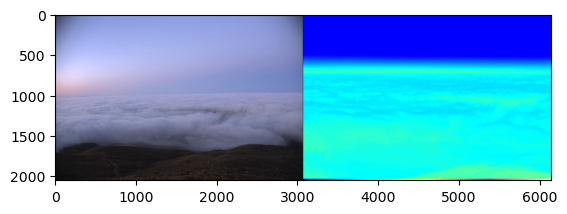

In [6]:
# Plot image as it is
img = cv2.imread(flist[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [26]:
flist = glob.glob(out_dir+'/*celsius*.csv')
flist.sort()
flist

['/Users/bhupendra/data/mobotix/V017/sage_mobotix_cam_20230602-122636_right_336x252_14bit.thermal.celsius_position0.csv',
 '/Users/bhupendra/data/mobotix/V017/sage_mobotix_cam_20230602-123138_right_336x252_14bit.thermal.celsius_position0.csv',
 '/Users/bhupendra/data/mobotix/V017/sage_mobotix_cam_20230602-123640_right_336x252_14bit.thermal.celsius_position0.csv',
 '/Users/bhupendra/data/mobotix/V017/sage_mobotix_cam_20230602-124142_right_336x252_14bit.thermal.celsius_position0.csv',
 '/Users/bhupendra/data/mobotix/V017/sage_mobotix_cam_20230602-124644_right_336x252_14bit.thermal.celsius_position0.csv',
 '/Users/bhupendra/data/mobotix/V017/sage_mobotix_cam_20230602-125147_right_336x252_14bit.thermal.celsius_position0.csv',
 '/Users/bhupendra/data/mobotix/V017/sage_mobotix_cam_20230602-125649_right_336x252_14bit.thermal.celsius_position0.csv',
 '/Users/bhupendra/data/mobotix/V017/sage_mobotix_cam_20230602-130151_right_336x252_14bit.thermal.celsius_position0.csv',
 '/Users/bhupendra/data/

In [48]:
fname= "/Users/bhupendra/data/mobotix/V017/sage_mobotix_cam_20230602-132159_right_336x252_14bit.thermal.celsius_position0.csv"
def get_thermal_data(fname):
    
    head = []
    with open(fname, 'r') as f:
        reader = csv.reader(f, delimiter=';')
        for i in range(7):
            headers = next(reader)
            head.append(headers)
        _ = next(reader)
        data = np.expand_dims(np.flipud(np.array(list(reader)).astype(float)), axis=0)
    fname.split()
    time_str = re.search('\\d{8}-\\d{6}', fname).group(0)
    dt = datetime.datetime.strptime(time_str, '%Y%m%d-%H%M%S')
    ctime = cftime.datetime(dt.year, dt.month, dt.day, hour=dt.hour, minute=dt.minute, second=dt.second)    

    ds = xr.Dataset({
    'thermalimage': xr.DataArray(
                data   = data,   # enter data here
                dims   = ['time', 'y', 'x'],
                coords = {'time': [ctime],
                            'y' : np.arange(data.shape[1]),
                            'x' : np.arange(data.shape[2])},
                attrs  = {
                    '_FillValue': -999.9,
                    'units'     : 'celsius'
                    }
                ),
            },
        attrs = {'Source': 'MOBOTIX TIR camera'}
    )


    return ds





ds = get_thermal_data(fname)
ds

<xarray.Dataset>
Dimensions:       (time: 1, y: 252, x: 336)
Coordinates:
  * time          (time) object 2023-06-02 13:21:59
  * y             (y) int64 0 1 2 3 4 5 6 7 ... 244 245 246 247 248 249 250 251
  * x             (x) int64 0 1 2 3 4 5 6 7 ... 328 329 330 331 332 333 334 335
Data variables:
    thermalimage  (time, y, x) float64 6.29 6.21 6.21 ... -43.95 -44.07 -43.95
Attributes:
    Source:   MOBOTIX TIR camera

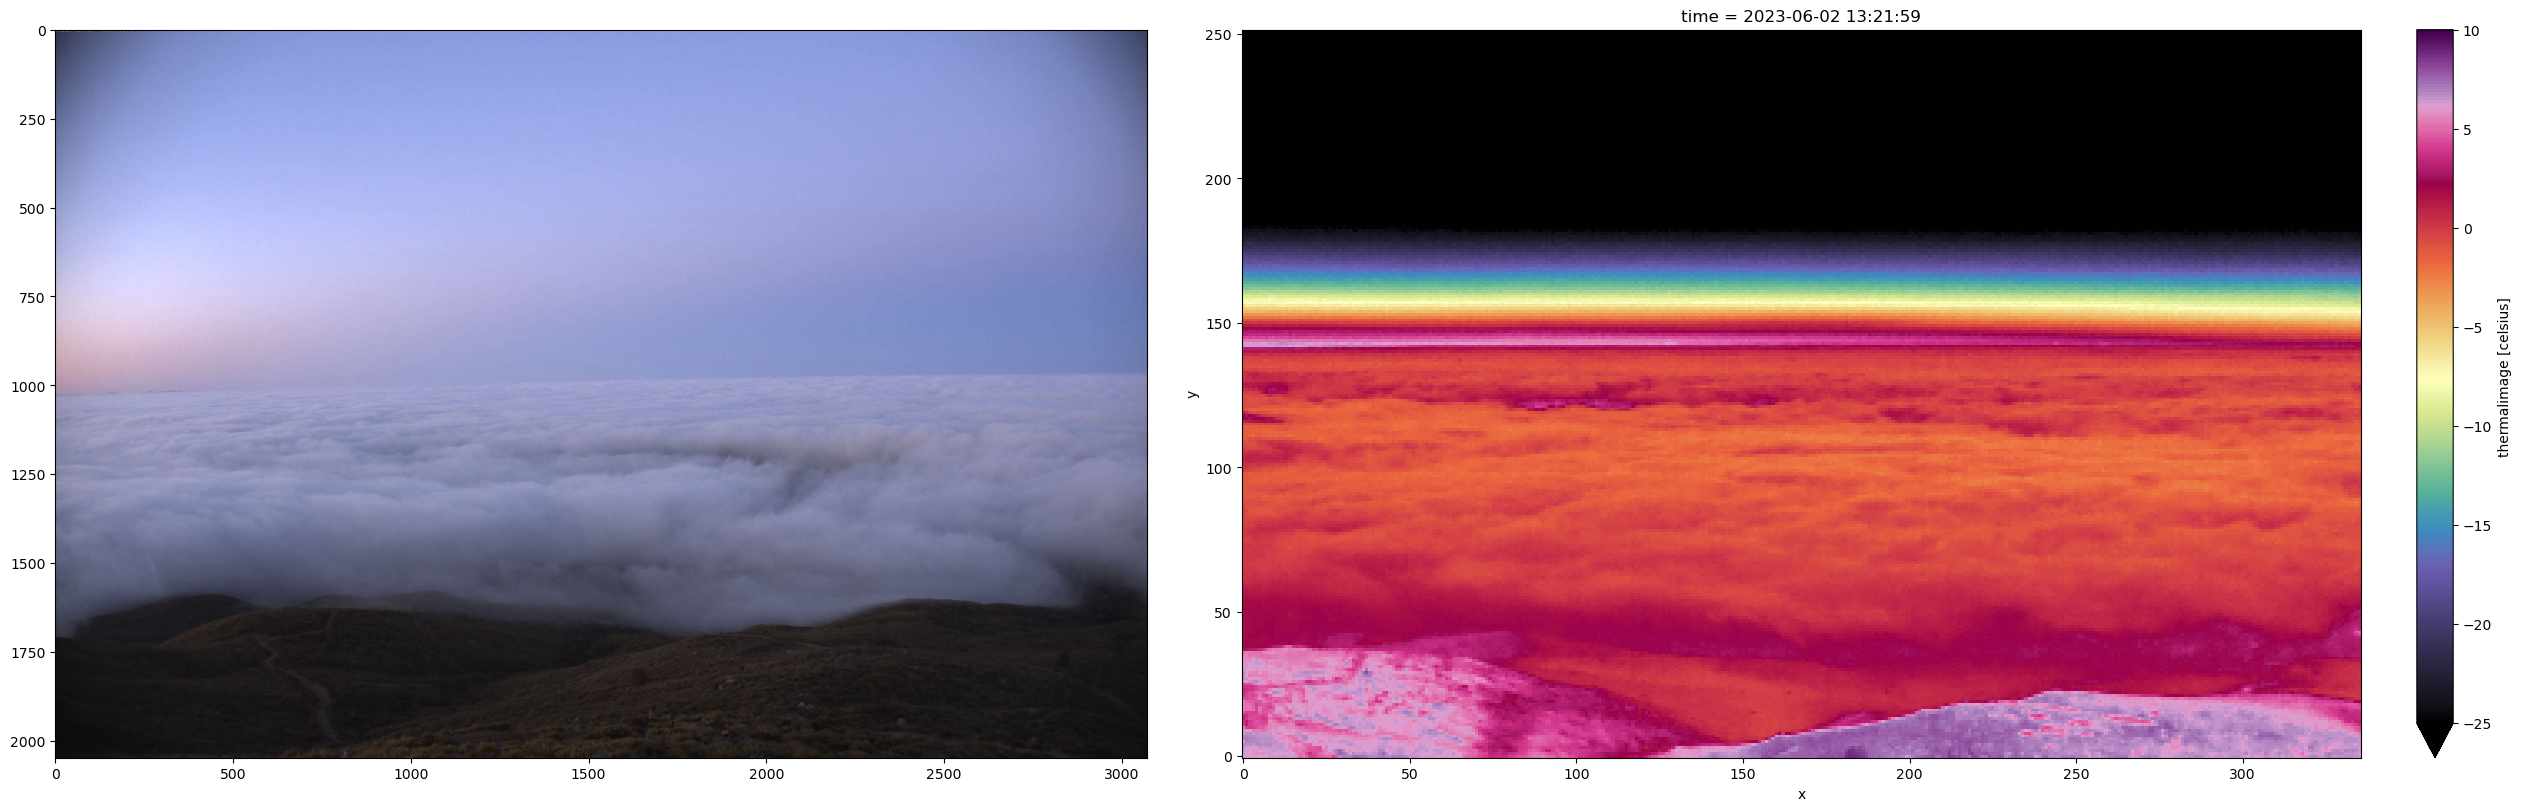

In [76]:
# Plot visible image and thermal data from CSV
fig, axs = plt.subplots( ncols=2, nrows=1, figsize=[25,8], constrained_layout=True)
axs[0].imshow(img[:, 0:3072, :])
ds.thermalimage.plot(ax=axs[1], vmin = -25, vmax = 10, cmap=pyart.graph.cm_colorblind.ChaseSpectral)